# Predicting Customer Churn

This is a modeling challenge created by Teradata Center for Customer Relationship Management at Duke University. The purpose is to predict which customers are most likely to churn, so proactive steps (e.g. appropriate communication and treatment programs) can be taken to prevent customers from churning.

## Data

The data consists of calibration and validation samples of customers from a major wireless telecommunications company. The calibration sample includes observed churn and a set of potential predictor variables.

The predictors include three types of variables: behavioral data such as minutes of use, revenue, handset equipment; company interaction data such as customer calls into the customer service center, and customer household demographics.

Size of dataset is 10,000 records, with 171 predictors. The classes (churn, no-churn) are balanced in the dataset, with 49562 records of class "churn" and 50438 records of class "no churn"

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
%matplotlib inline

In [20]:
data = pd.read_csv("D:/datasets/churn/tourn_1_calibration_csv/tourn_1_calibration_csv.csv", encoding="utf")

In [50]:
churn = data[data["churn"] == 1]
nochurn = data[data["churn"] == 0]

churn.shape, nochurn.shape

((49562, 173), (50438, 173))

In [16]:
data.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,rev_Range,...,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,car_buy,retdays,eqpdays,churn,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0,0,25.99,...,U,U,U,U,Y,New,23,361,1,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0,0,153.14,...,U,U,U,U,Y,UNKNOWN,NaN,240,0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0,0,0.00,...,Y,U,U,U,Y,New,NaN,1504,1,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0,0,0.00,...,U,U,U,U,Y,New,NaN,1812,0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0,0,0.00,...,U,U,U,U,Y,New,NaN,434,0,1000005


In [17]:
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,rev_Range,...,age2,adults,income,numbcars,forgntvl,educ1,retdays,eqpdays,churn,Customer_ID
count,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,99643.000000,...,98268.000000,76981.000000,74564.000000,50634.000000,98268.000000,13522.000000,3983.000000,99999.000000,100000.000000,100000.000000
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,44.624123,...,20.781770,2.530326,5.783112,1.567563,0.057974,1.868511,215.090635,391.932309,0.495620,1050000.500000
std,46.291677,525.168140,23.623489,2.177619,97.296150,30.500885,30.056089,3.126531,14.711374,88.135464,...,23.760386,1.452819,2.182132,0.625456,0.233696,0.840167,213.201191,256.482193,0.499983,28867.657797
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,1000001.000000
25%,33.260000,150.750000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.980000,...,0.000000,1.000000,4.000000,1.000000,0.000000,1.000000,29.000000,212.000000,0.000000,1025000.750000
50%,48.195000,355.500000,44.990000,0.247500,2.750000,1.000000,0.682500,0.000000,0.000000,16.190000,...,0.000000,2.000000,6.000000,1.000000,0.000000,2.000000,134.000000,342.000000,0.000000,1050000.500000
75%,70.750000,703.000000,59.990000,0.990000,42.000000,14.437500,14.025000,0.000000,0.235000,57.690000,...,42.000000,3.000000,7.000000,2.000000,0.000000,2.000000,360.000000,530.000000,1.000000,1075000.250000
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,13740.540000,...,99.000000,6.000000,9.000000,3.000000,1.000000,4.000000,966.000000,1823.000000,1.000000,1100000.000000


## Exploratory Data Analysis

Some observations of the data:

1. Data is a mix of categorical and continuous variables.

2. Some features contains a large number of missing values.

3. Data is high dimensional, hence some form of dimentionality reduction may be necessary.

In [18]:
# Plot few categorical features
import seaborn as sns
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)

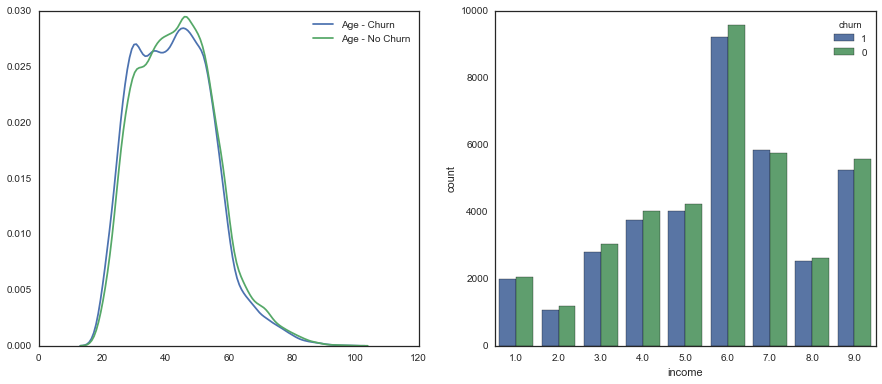

In [19]:
# Plot curn by age feature
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1,2,1)
data_age = data[data["age1"] != 0] # Remove missing values
data_age = data_age.sort_values(by="age1")
churn = data_age[data_age["churn"] == 1]
nochurn = data_age[data_age["churn"] == 0]
sns.kdeplot(churn["age1"], label="Age - Churn")
sns.kdeplot(nochurn["age1"], label="Age - No Churn")
plt.legend()

# Most customers are in the range of 20-50 years. However, there does not appear to be a clear pattern between churn/no-churn.

# Plot churn by income
ax2 = fig.add_subplot(1,2,2)
data_inc = data[data["income"] != 0] # Remove missing values
data_inc = data_inc.sort_values(by="income")
sns.countplot(x="income", hue="churn", data=data_inc)

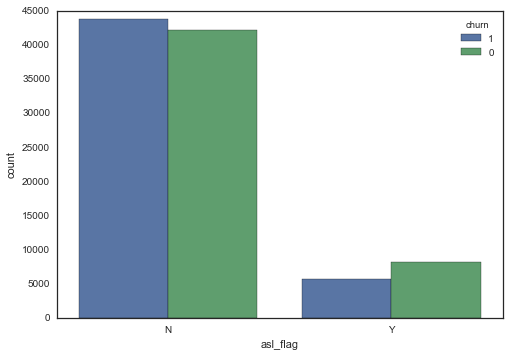

In [25]:
# Plot churn by account spending limit
data_spl = data[data["asl_flag"] != 0] # Remove missing values
data_spl = data_spl.sort_values(by="asl_flag")
sns.countplot(x="asl_flag", hue="churn", data=data_spl)

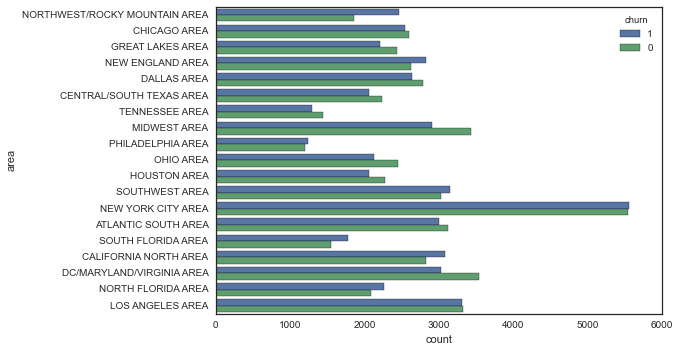

In [26]:
# Plot churn by states/areas
sns.countplot(y="area", hue="churn", data=data)

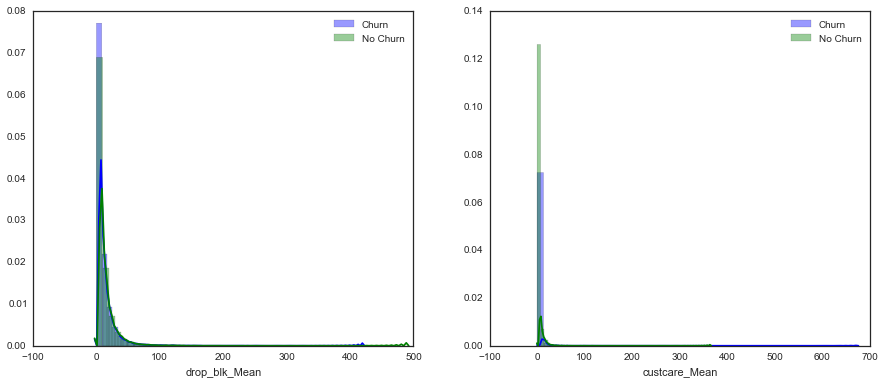

In [28]:
# Plot few continuous features

fig = plt.figure(figsize=(15, 6))

# Plot number of blocked/dropped calls
churn = data[data["churn"]==1]
nochurn = data[data["churn"]==0]

ax1 = fig.add_subplot(1,2,1)
sns.distplot(churn["drop_blk_Mean"], color="b", label="Churn")
sns.distplot(nochurn["drop_blk_Mean"], color="g", label="No Churn")
plt.legend()

# Surprisingly, # of dropped/blocked calls does not been to a major factor for churn.

# Mean number of customer care calls
ax1 = fig.add_subplot(1,2,2)
sns.distplot(churn["custcare_Mean"], color="b", label="Churn")
sns.distplot(nochurn["custcare_Mean"], color="g", label="No Churn")
plt.legend()

# Surprisingly, it appears higher number of customer calls are present in no-churn customers

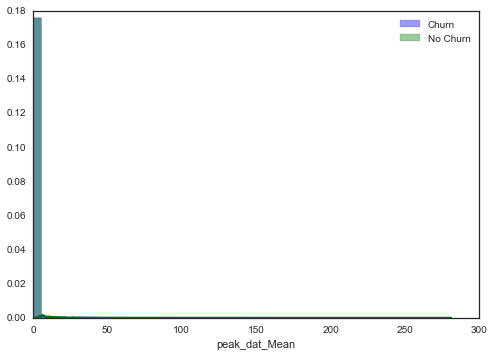

In [20]:
# Mean number of peak data calls
sns.distplot(churn["peak_dat_Mean"], color="b", label="Churn")
sns.distplot(nochurn["peak_dat_Mean"], color="g", label="No Churn")
plt.legend()

# Higher churn is observed in customers having higher peak data calls. 
# It's possible the data service provided by the telecom provider is not competitive. It could also imply data collection issue.

Looking at these plots, it appears that continuous features are more indicative of churn than categorical. Continuous features are based on usage, and customer interaction, which categorical are based on demographics, customer data.

## Data Preprocessing/Cleaning & Feature Engineering

### Imputing missing values
Input data contains a large number of missing values. Features having more than 95% missing values have been excluded from the preprocessed data. Missing values in categorical features have been imputed by mode, while missing values in continuous features have been imputed with median (as median is more robust to noisy data, as compared to mean). 

### Data encoding & normalization
Most learning algorithms work and expect numeric as well as normalized data. Hence categorical features were encoded to numeric values, and continuous values normalized.

### Deriving new features
Some features were aggregated into new features. For example, one 'vehicle' feature was created from 'truck', 'motorcycle' and 'rv' features. 
Decision Tree prediction probabilities were used as new features in the data set.

### Feature Selection
Categorical features were down-selected by using Scikit's SelectPercentile function, which removes all but a user-specified (80% in our case) highest scoring percentage of features, using ANOVA F-value as scoring function. 

### What else was tried, but not included in final solution
1. Range features were removed, as Mean features were included. Posteriori showed that Range features were more useful.
2. Feature selection of continuous features.
3. Feature scaling was tried, but didn't give suitable results.
4. PCA Reduction

## Model Fitting

Data being a mix of categorical and continuous variables, decision tree based classifiers were tried. Logistic regression was also tried.

Different models that were inspected:
1. Logistic Regression

2. Random Forest with 150 trees

3. Gradient Boosted Trees with 100 trees

4. Stacked generalizer: Logistic regression trained on predicted probabilities of Random Forest & GBT models

5. Weighted majority voting ensemble of Random Forest & GBT.

Grid Search of different parameters was tried to search the hyper parameter space.

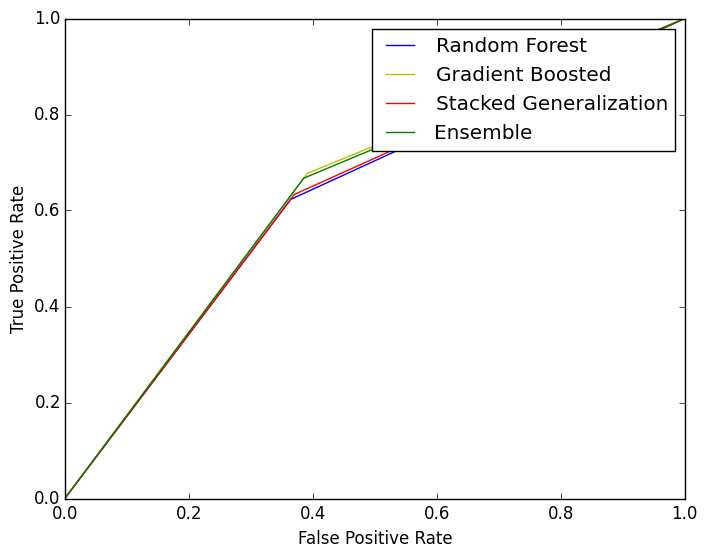

In [51]:
# ROC curves have been plotted for different models, on test set.
from IPython.display import Image
Image(filename='ROC_curves_churn.png')

#It is evident, from the plot below, that there is no significant difference between models. 
# Gradient boosted model appears to give the best results, followed by ensemble.
# But lets explore detailed metrics to confirm what the best model is for this problem. 

In [ ]:
# Plot confusion matrices of each different models

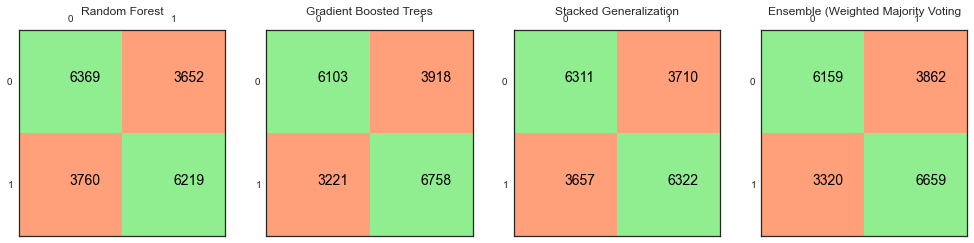

In [55]:
%run D:/python_files/churn/plot_confusion_matrix.py

In [54]:
# Print metrics of different models
metrics = pd.read_csv("D:/python_files/churn/metrics.csv", encoding="utf-8")
print metrics

               Classifier  Precision    Recall  F1 score  Time to train
0           Random Forest   0.630027  0.623209  0.626599        219.724
1        Gradient Boosted   0.633009  0.677222  0.654369        292.900
2  Stacked Generalization   0.630183  0.633530  0.631852        511.477
3                Ensemble   0.632925  0.667301  0.649659        524.866


Since the problem is to detect churn, we need to look at Precision & Recall in this context. A higher # of FPs (false positives, i.e customers who will not churn, but are predicted by our model to churn) is acceptable, but high # of FN's (false negatives, i.e. customers who will churn, but predicted by our model as not churning) could be unforgivable.

We conclude that Gradient Boosted model is the best model for our problem, as it has the lowest # of false negatives, while also having a high true positive/negative rate.

## Feature Ranking

Best features, as determined by Gradient Boosting:

Feature ranking by Gradient Boosted Model:
1. feature mouowylisv_Range (0.092973)
2. feature adjrev (0.083675)
3. feature mouowylisv_Mean (0.067991)
4. feature comp_dat_Range (0.059290)
5. feature plcd_dat_Range (0.055239)
6. feature owylis_vce_Range (0.041458)
7. feature ethnic (0.032103)
8. feature adults (0.026793)
9. feature cartype (0.025220)
10. feature drop_dat_Mean (0.024594)